In [1]:
import numpy as np 
import cv2
import sys
from PIL import Image
from matplotlib import pyplot as plt 
import os
from PIL import Image, ImageOps


In [2]:
def initialize_K_centroids(X, K):
    m = X.shape[0]
    return X[np.random.choice(m, K, replace=False), :] 

In [3]:

def find_closest_centroids(X, centroids):
    m = X.shape[0]
    c = np.zeros(m) # a 0 array in size of the number of the pixels
    
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1) ## liniar algebra finciton - founds the d(pixels) in 3d for each pixel it`s overrids the previous value each time

        # Assign closest centroid of a cluster to c[i]
        c[i] = np.argmin(distances)

    return c

In [4]:

def compute_means(X, assigned_pixels_list, K):
    n = X.shape[1]
    centroids = np.zeros((K, n)) ## matrix of the centroids 
    for centroid_index in range(K):
        examples = X[np.where(assigned_pixels_list == centroid_index)] ## which pixel (represented as rows in X) go to which centroid (represented by an index 0 - > K)
        mean = [np.mean(column) for column in examples.T] ## reads it rtl , takes the col which will be at first list of R numbers and then cals an avg for each z axsis list 
        centroids[centroid_index] = mean ## assigns the mean centroid calculated to a list of the centroids
    return centroids

In [5]:
def find_k_means(X, K, max_iters): # max_iter limits the function as in some point it would not find any new centroids 
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for i in range(max_iters):
        assigned_pixels_list = find_closest_centroids(X, centroids)
        centroids = compute_means(X, assigned_pixels_list, K)
        if (previous_centroids==centroids).all(): ## if the centroids are not moving (.all makes it check each one )
            return centroids
        else:
            previous_centroids = centroids

    return centroids


In [10]:
path = 'image.jpg' # insert the image location
image = Image.open(path)
image = np.asarray(image) /255
w, h, d = image.shape

Running K-means
221518 bytes before compression
50636 bytes after compression
compression percentage: 77%


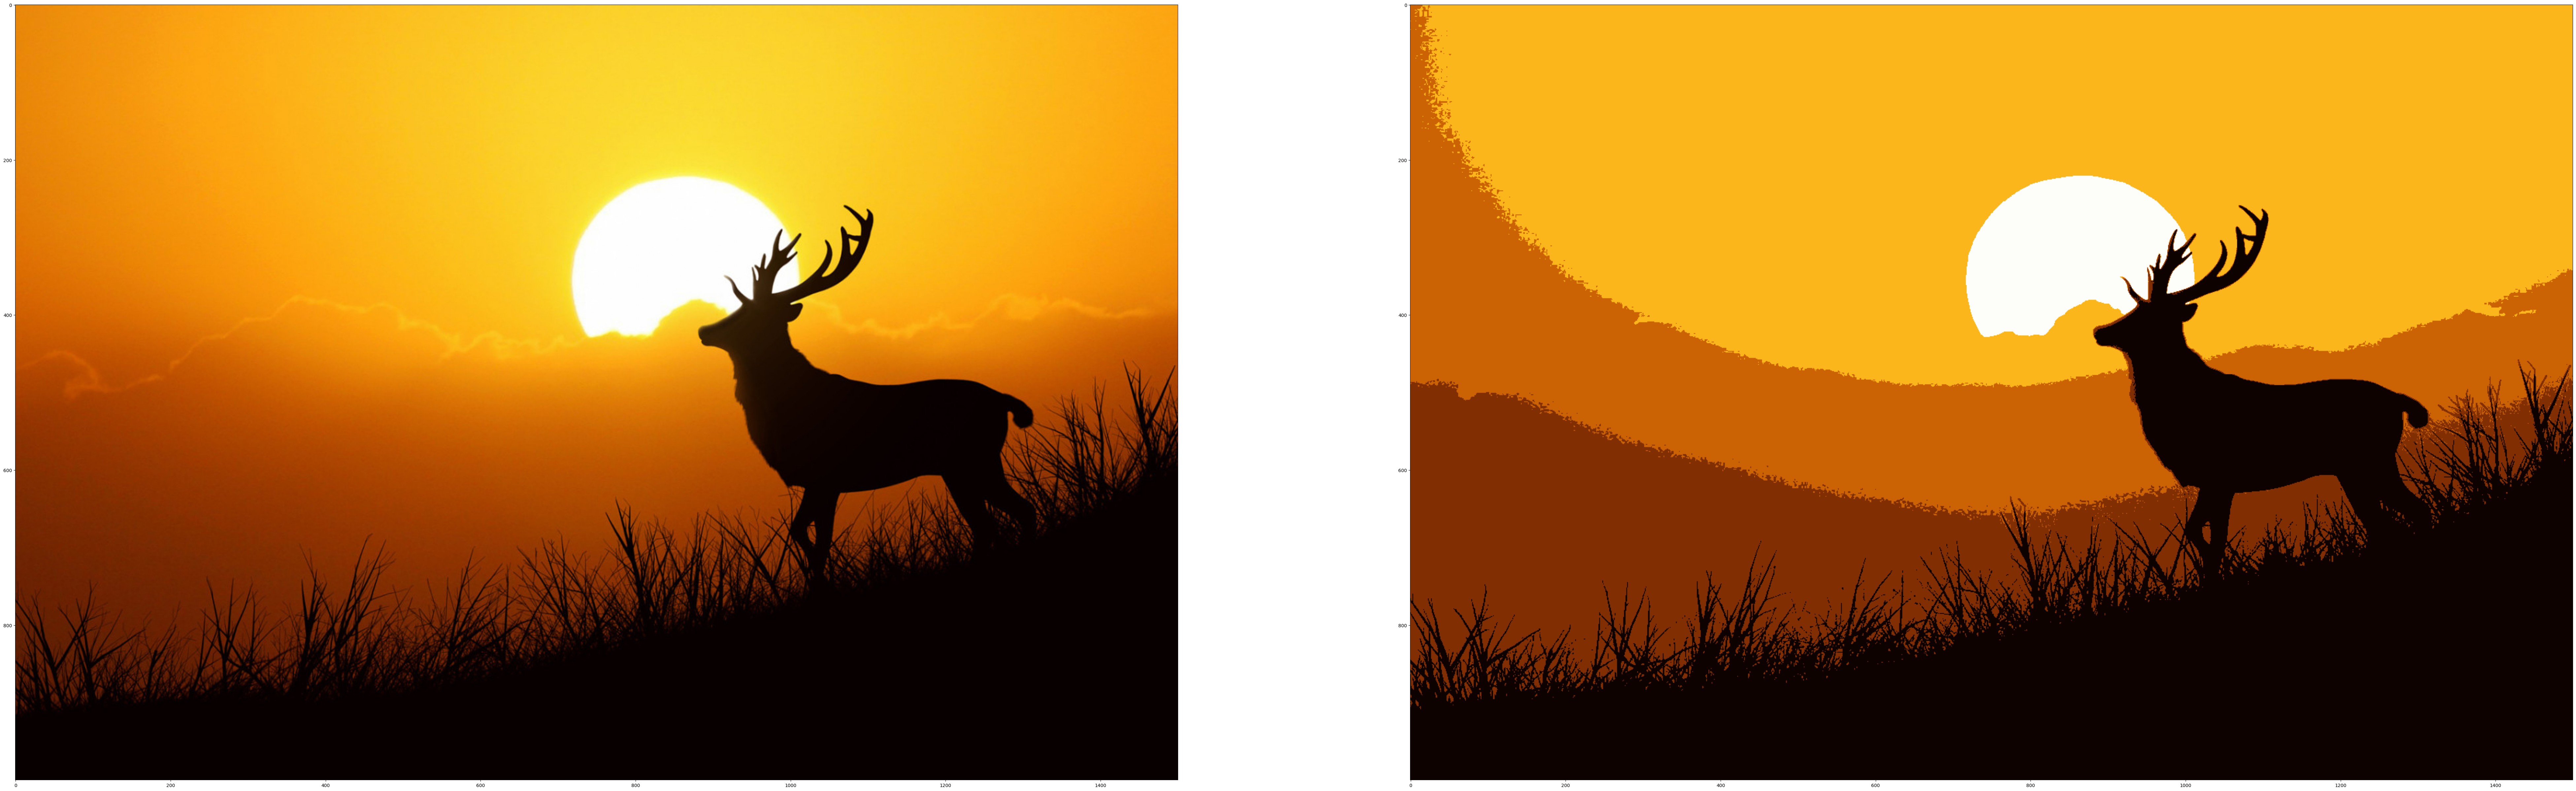

In [13]:
# flatting the matrix to a pixels * 3
X = image.reshape((w * h, d))
K = 5 # the number of colors in the image

# Get colors
print('Running K-means')
Centroids = find_k_means(X, K, max_iters=10) ## gets the final centroids 

# Indexes for color for each pixel
idx = find_closest_centroids(X, Centroids) ## gets the assigment of each pixel to it`s centroid

# Reconstruct the image
idx = np.array(idx, dtype=np.uint8) ## casting
Centroids*=255
X_AfterKmean = np.array(Centroids[idx, :] , dtype=np.uint8).reshape((w, h, d))


compressed_image = Image.fromarray(X_AfterKmean)

compressed_image.save('after.png')
A  = os.stat(path).st_size
B = os.stat('after.png').st_size
percentage  = int(100 - (B * 100 / A))
print(str(A) + " bytes before compression")
print(str(B) + " bytes after compression")
print("compression percentage: " + str(percentage) + "%")

plt.figure(figsize = (100,200))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(compressed_image)


